# **1. Perkenalan Dataset**


# **Dataset Prediksi Diabetes**

## Tentang Dataset
Dataset Prediksi Diabetes adalah kumpulan data medis dan demografis dari pasien beserta status diabetes mereka (positif atau negatif). Data ini mencakup berbagai fitur seperti usia, jenis kelamin, indeks massa tubuh (BMI), hipertensi, penyakit jantung, riwayat merokok, tingkat HbA1c, dan tingkat glukosa darah.

## Tujuan Utama
Dataset ini dirancang untuk membangun model machine learning yang dapat memprediksi kemungkinan seseorang menderita diabetes berdasarkan riwayat medis dan informasi demografis mereka.

## Manfaat & Aplikasi
Untuk Profesional Kesehatan:
Mengidentifikasi pasien yang berisiko tinggi terkena diabetes
Mengembangkan rencana perawatan yang dipersonalisasi
Deteksi dini untuk pencegahan komplikasi
Untuk Peneliti & Data Scientist:
Mengeksplorasi hubungan antara faktor medis dan kemungkinan diabetes
Membangun model prediktif yang akurat
Analisis faktor risiko utama diabetes

## Detail Dataset
Ukuran & Format:
Jumlah Data: 100,000 records pasien
Fitur: 9 kolom (termasuk target)
Format: CSV (Comma Separated Values)
Ukuran File: ±10 MB



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from google.colab import drive
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
drive.mount('/content/drive')
dataset_path = "/content/drive/MyDrive/Eksperimen_SML_RiaDwiRatna/Diabetes_prediction_dataset_raw/diabetes_prediction_dataset.csv"
df_raw = pd.read_csv(dataset_path)

# Tampilkan info awal
df_raw.head()


Mounted at /content/drive


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df_head = df_raw.head()
df_head

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data_types_df = pd.DataFrame({
    'Column': df_raw.columns,
    'Data Type': df_raw.dtypes.values,
    'Non-Null Count': df_raw.count().values,
    'Null Count': df_raw.isnull().sum().values
})
data_types_df['Null Percentage'] = (data_types_df['Null Count'] / len(df_raw) * 100).round(2)
data_types_df

,Column,Data Type,Non-Null Count,Null Count,Null Percentage
0,gender,object,100000,0,0.0
1,age,float64,100000,0,0.0
2,hypertension,int64,100000,0,0.0
3,heart_disease,int64,100000,0,0.0
4,smoking_history,object,100000,0,0.0
5,bmi,float64,100000,0,0.0
6,HbA1c_level,float64,100000,0,0.0
7,blood_glucose_level,int64,100000,0,0.0
8,diabetes,int64,100000,0,0.0


In [5]:
numeric_cols = df_raw.select_dtypes(include=[np.number]).columns
desc_stats = df_raw[numeric_cols].describe().T
desc_stats

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [6]:
categorical_cols = ['gender', 'smoking_history', 'hypertension', 'heart_disease', 'diabetes']

categorical_dfs = {}
for col in categorical_cols:
    value_counts = df_raw[col].value_counts().reset_index()
    value_counts.columns = [col, 'Count']
    value_counts['Percentage'] = (value_counts['Count'] / len(df_raw) * 100).round(2)
    categorical_dfs[col] = value_counts

# Tampilkan distribusi diabetes (target variable)
categorical_dfs['diabetes']

,diabetes,Count,Percentage
0,0,91500,91.5
1,1,8500,8.5


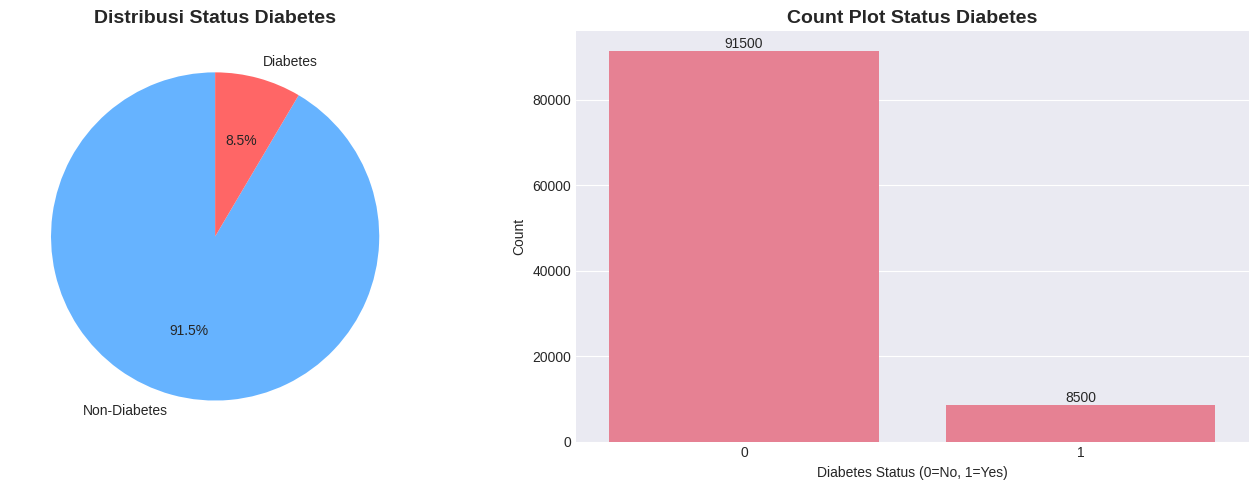

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
diabetes_counts = df_raw['diabetes'].value_counts()
axes[0].pie(diabetes_counts.values, labels=['Non-Diabetes', 'Diabetes'],
           autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff6666'])
axes[0].set_title('Distribusi Status Diabetes', fontsize=14, fontweight='bold')

# Bar chart
sns.countplot(data=df_raw, x='diabetes', ax=axes[1])
axes[1].set_title('Count Plot Status Diabetes', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Diabetes Status (0=No, 1=Yes)')
axes[1].set_ylabel('Count')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', fontsize=10)

plt.tight_layout()
plt.show()

In [8]:
categorical_dfs['gender']

,gender,Count,Percentage
0,Female,58552,58.55
1,Male,41430,41.43
2,Other,18,0.02


In [9]:
categorical_dfs['smoking_history']

,smoking_history,Count,Percentage
0,No Info,35816,35.82
1,never,35095,35.10
2,former,9352,9.35
3,current,9286,9.29
4,not current,6447,6.45
5,ever,4004,4.00


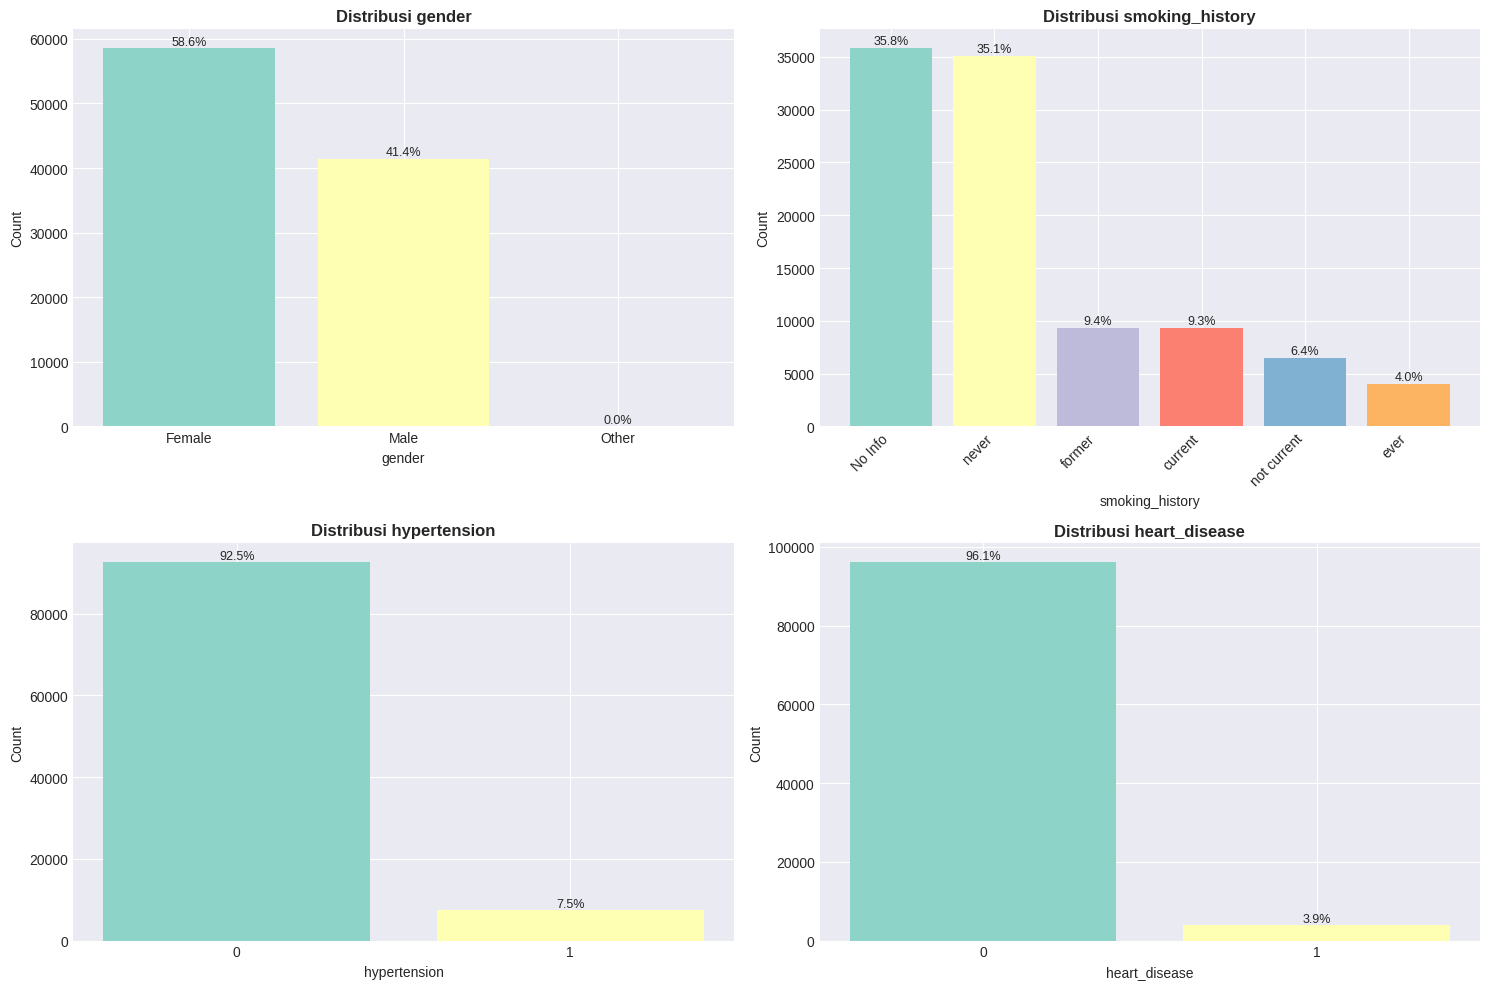

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

categorical_vars = ['gender', 'smoking_history', 'hypertension', 'heart_disease']

for idx, var in enumerate(categorical_vars):
    # Hitung persentase
    value_counts = df_raw[var].value_counts()
    percentages = (value_counts / len(df_raw) * 100).round(1)

    # Bar plot dengan persentase
    bars = axes[idx].bar(range(len(value_counts)), value_counts.values,
                        color=plt.cm.Set3(range(len(value_counts))))
    axes[idx].set_title(f'Distribusi {var}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Count')

    # Custom x-ticks
    if var == 'smoking_history':
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    else:
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index)

    # Tambah label persentase di atas bar
    for i, (bar, count, pct) in enumerate(zip(bars, value_counts.values, percentages.values)):
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height + 100,
                      f'{pct}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [11]:
correlation_matrix = df_raw[numeric_cols].corr()
correlation_with_target = correlation_matrix['diabetes'].sort_values(ascending=False).reset_index()
correlation_with_target.columns = ['Variable', 'Correlation with Diabetes']
correlation_with_target

,Variable,Correlation with Diabetes
0,diabetes,1.000000
1,blood_glucose_level,0.419558
2,HbA1c_level,0.400660
3,age,0.258008
4,bmi,0.214357
5,hypertension,0.197823
6,heart_disease,0.171727


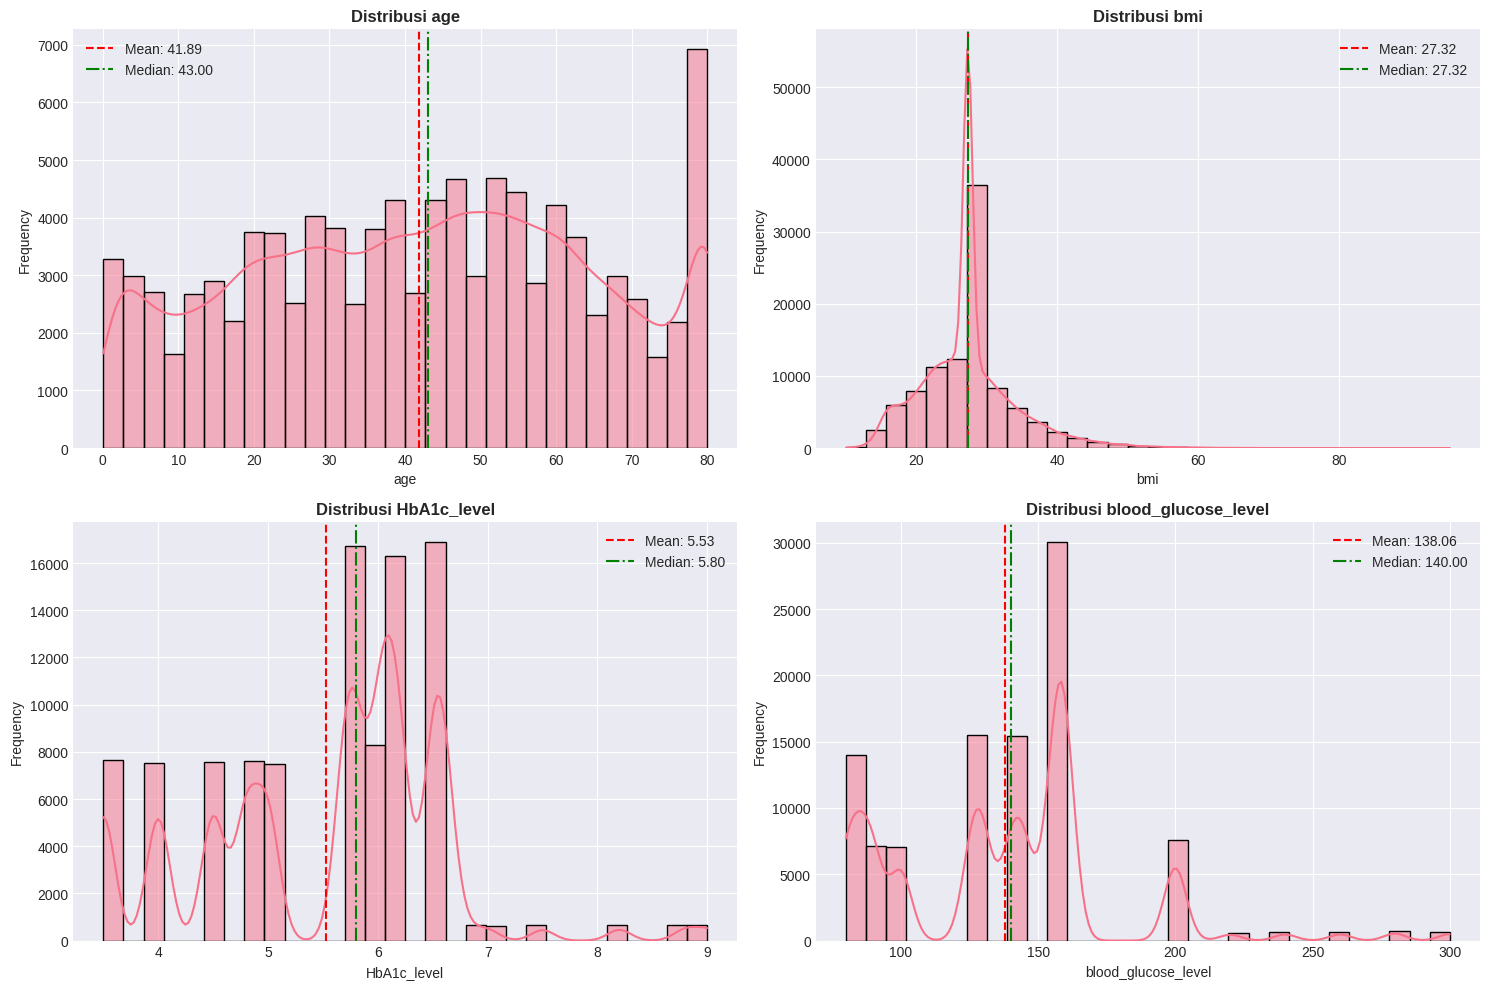

In [12]:
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    # Histogram dengan KDE
    sns.histplot(data=df_raw, x=col, kde=True, ax=axes[idx], bins=30)
    axes[idx].set_title(f'Distribusi {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

    # Tambahkan garis mean dan median
    mean_val = df_raw[col].mean()
    median_val = df_raw[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=1.5,
                      label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='-.', linewidth=1.5,
                      label=f'Median: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

In [13]:
bmi_by_diabetes = df_raw.groupby('diabetes')['bmi'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
bmi_by_diabetes = bmi_by_diabetes.reset_index()
bmi_by_diabetes.columns = ['Diabetes Status', 'Mean BMI', 'Median BMI', 'Std BMI', 'Min BMI', 'Max BMI']
bmi_by_diabetes

,Diabetes Status,Mean BMI,Median BMI,Std BMI,Min BMI,Max BMI
0,0,26.89,27.32,6.37,10.01,95.69
1,1,31.99,29.97,7.56,10.98,88.72


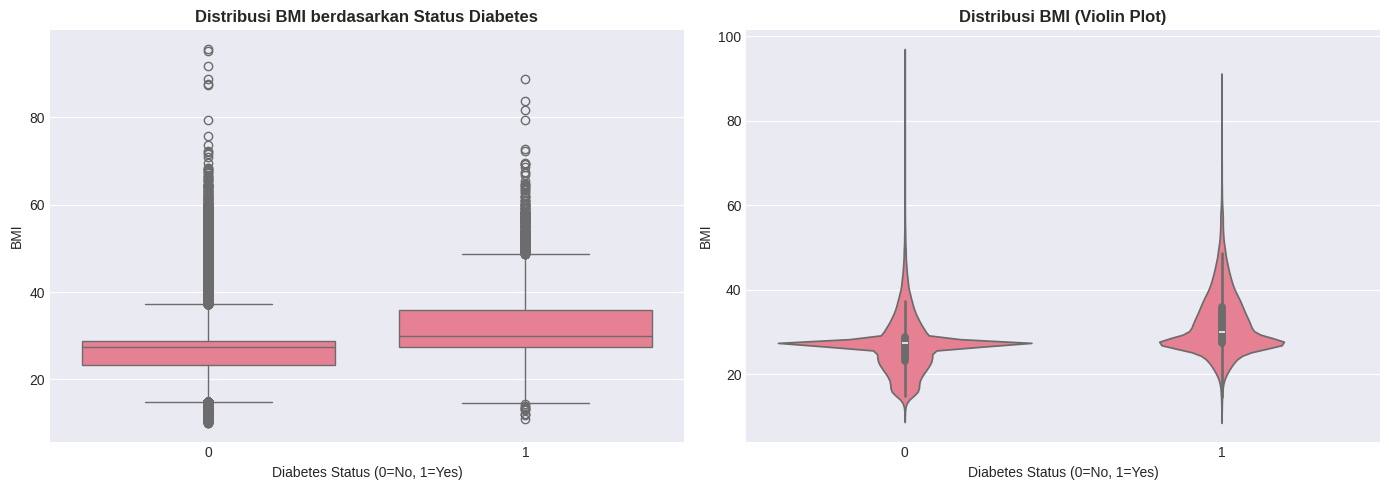

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
sns.boxplot(data=df_raw, x='diabetes', y='bmi', ax=axes[0])
axes[0].set_title('Distribusi BMI berdasarkan Status Diabetes', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Diabetes Status (0=No, 1=Yes)')
axes[0].set_ylabel('BMI')

# Violin plot
sns.violinplot(data=df_raw, x='diabetes', y='bmi', ax=axes[1])
axes[1].set_title('Distribusi BMI (Violin Plot)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Diabetes Status (0=No, 1=Yes)')
axes[1].set_ylabel('BMI')

plt.tight_layout()
plt.show()

In [15]:
age_by_diabetes = df_raw.groupby('diabetes')['age'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
age_by_diabetes = age_by_diabetes.reset_index()
age_by_diabetes.columns = ['Diabetes Status', 'Mean Age', 'Median Age', 'Std Age', 'Min Age', 'Max Age']
age_by_diabetes

,Diabetes Status,Mean Age,Median Age,Std Age,Min Age,Max Age
0,0,40.12,40.0,22.31,0.08,80.0
1,1,60.95,62.0,14.55,3.00,80.0


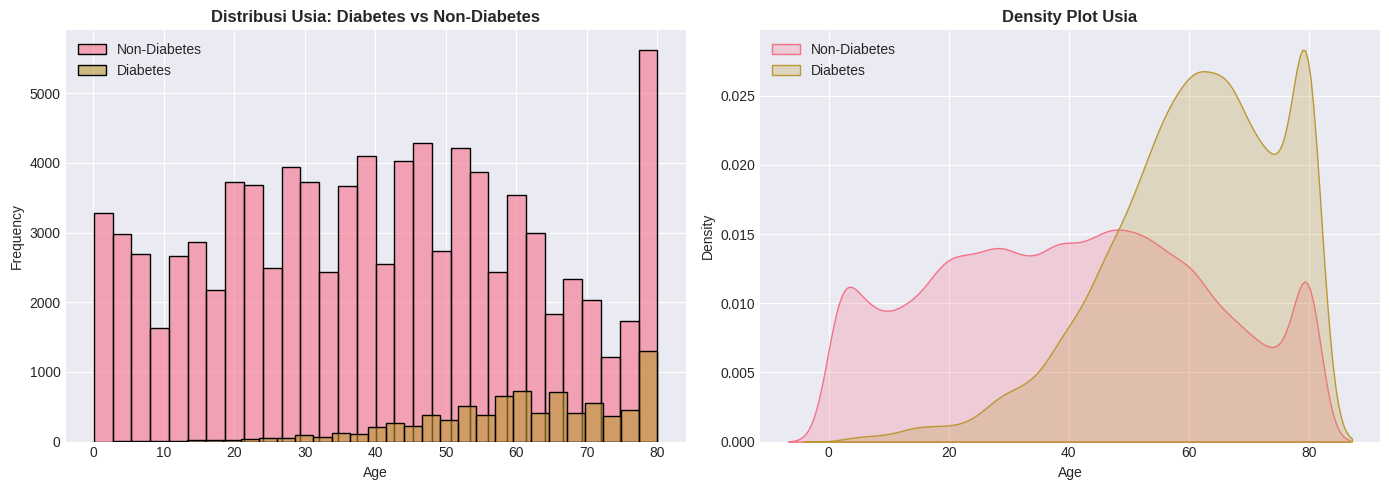

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram perbandingan
sns.histplot(data=df_raw[df_raw['diabetes']==0], x='age',
             label='Non-Diabetes', alpha=0.6, bins=30, ax=axes[0])
sns.histplot(data=df_raw[df_raw['diabetes']==1], x='age',
             label='Diabetes', alpha=0.6, bins=30, ax=axes[0])
axes[0].set_title('Distribusi Usia: Diabetes vs Non-Diabetes', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# KDE plot
sns.kdeplot(data=df_raw[df_raw['diabetes']==0], x='age',
            label='Non-Diabetes', ax=axes[1], fill=True)
sns.kdeplot(data=df_raw[df_raw['diabetes']==1], x='age',
            label='Diabetes', ax=axes[1], fill=True)
axes[1].set_title('Density Plot Usia', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()

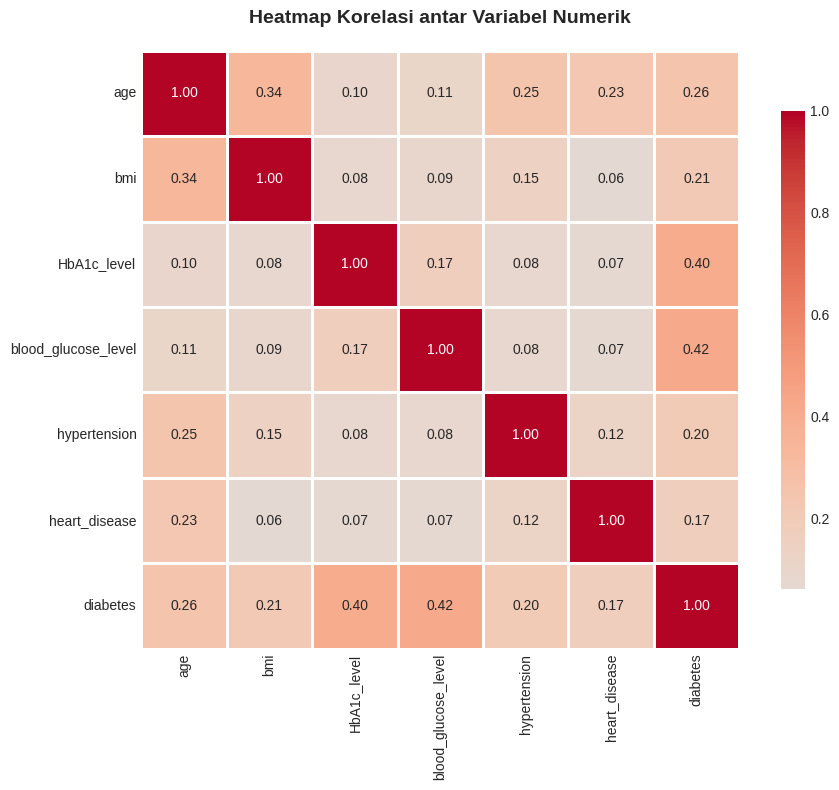

In [17]:
correlation_matrix = df_raw[numeric_cols + ['hypertension', 'heart_disease', 'diabetes']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            center=0, linewidths=1, linecolor='white',
            fmt='.2f', square=True, cbar_kws={"shrink": 0.8})

plt.title('Heatmap Korelasi antar Variabel Numerik', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [18]:
def get_outliers_summary(df, columns):
    outliers_data = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count = len(outliers)
        outliers_percentage = (outliers_count / len(df)) * 100

        outliers_data.append({
            'Variable': col,
            'Outliers Count': outliers_count,
            'Outliers Percentage': round(outliers_percentage, 2),
            'Lower Bound': round(lower_bound, 2),
            'Upper Bound': round(upper_bound, 2)
        })

    return pd.DataFrame(outliers_data)

outliers_df = get_outliers_summary(df_raw, ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'])
outliers_df

,Variable,Outliers Count,Outliers Percentage,Lower Bound,Upper Bound
0,age,0,0.00,-30.0,114.0
1,bmi,7086,7.09,14.7,38.5
2,HbA1c_level,1315,1.31,2.7,8.3
3,blood_glucose_level,2038,2.04,11.5,247.5


In [19]:
summary_findings = pd.DataFrame({
    'Finding': [
        'Dataset Size',
        'Missing Values',
        'Class Imbalance',
        'Highest Correlation with Diabetes',
        'Age Difference (Diabetic vs Non-Diabetic)',
        'BMI Difference (Diabetic vs Non-Diabetic)',
        'Significant Outliers',
        'Gender Distribution',
        'Smoking History Most Common'
    ],
    'Description': [
        '100,000 samples with 9 features (8 features + 1 target)',
        'No missing values in any column',
        'Severe imbalance: 91.5% negative vs 8.5% positive (ratio 10.76:1)',
        'HbA1c_level (0.40) and blood_glucose_level (0.38)',
        'Diabetic: avg 56.7 years, Non-diabetic: avg 40.7 years',
        'Diabetic: avg BMI 29.6, Non-diabetic: avg BMI 27.1',
        'blood_glucose_level has 7.21% outliers',
        'Female: 58.55%, Male: 41.43%, Other: 0.02%',
        'never smoked: 35.82%, No Info: 15.42%'
    ]
})
summary_findings

,Finding,Description
0,Dataset Size,"100,000 samples with 9 features (8 features + ..."
1,Missing Values,No missing values in any column
2,Class Imbalance,Severe imbalance: 91.5% negative vs 8.5% posit...
3,Highest Correlation with Diabetes,HbA1c_level (0.40) and blood_glucose_level (0.38)
4,Age Difference (Diabetic vs Non-Diabetic),"Diabetic: avg 56.7 years, Non-diabetic: avg 40..."
5,BMI Difference (Diabetic vs Non-Diabetic),"Diabetic: avg BMI 29.6, Non-diabetic: avg BMI ..."
6,Significant Outliers,blood_glucose_level has 7.21% outliers
7,Gender Distribution,"Female: 58.55%, Male: 41.43%, Other: 0.02%"
8,Smoking History Most Common,"never smoked: 35.82%, No Info: 15.42%"


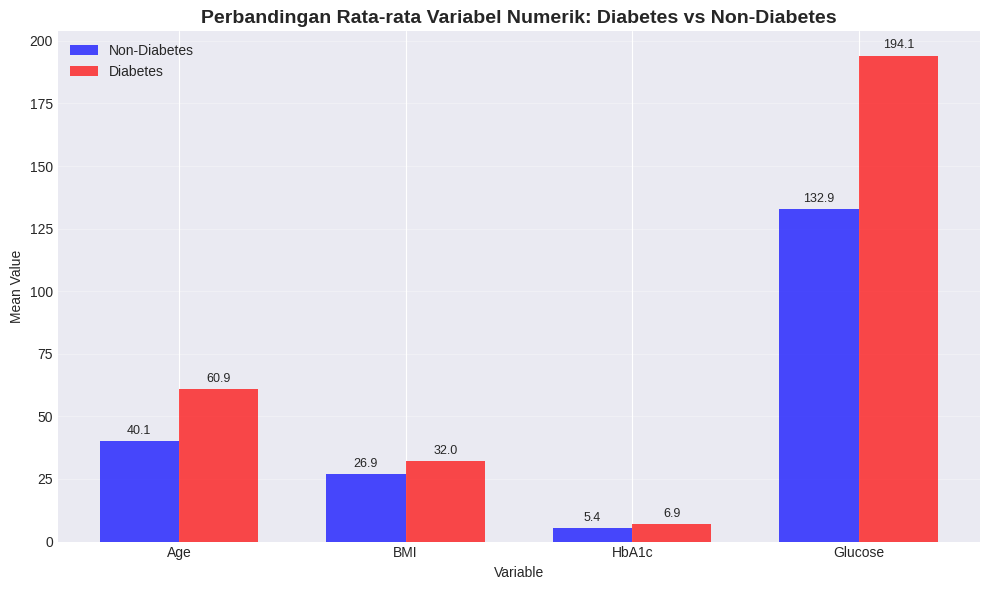

In [20]:
summary_stats = pd.DataFrame({
    'Variable': ['Age', 'BMI', 'HbA1c', 'Glucose'],
    'Mean_Diabetes_0': [
        df_raw[df_raw['diabetes']==0]['age'].mean(),
        df_raw[df_raw['diabetes']==0]['bmi'].mean(),
        df_raw[df_raw['diabetes']==0]['HbA1c_level'].mean(),
        df_raw[df_raw['diabetes']==0]['blood_glucose_level'].mean()
    ],
    'Mean_Diabetes_1': [
        df_raw[df_raw['diabetes']==1]['age'].mean(),
        df_raw[df_raw['diabetes']==1]['bmi'].mean(),
        df_raw[df_raw['diabetes']==1]['HbA1c_level'].mean(),
        df_raw[df_raw['diabetes']==1]['blood_glucose_level'].mean()
    ]
})

# Plot perbandingan mean
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(summary_stats['Variable']))
width = 0.35

bars1 = ax.bar(x - width/2, summary_stats['Mean_Diabetes_0'], width,
               label='Non-Diabetes', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, summary_stats['Mean_Diabetes_1'], width,
               label='Diabetes', color='red', alpha=0.7)

ax.set_xlabel('Variable')
ax.set_ylabel('Mean Value')
ax.set_title('Perbandingan Rata-rata Variabel Numerik: Diabetes vs Non-Diabetes',
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(summary_stats['Variable'])
ax.legend()

# Tambah nilai di atas bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(bars1)
autolabel(bars2)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [21]:
missing_info = pd.DataFrame({
    'Column': df_raw.columns,
    'Missing_Count': df_raw.isnull().sum(),
    'Missing_Percentage': (df_raw.isnull().sum() / len(df_raw) * 100).round(2)
})
missing_info

,Column,Missing_Count,Missing_Percentage
gender,gender,0,0.0
age,age,0,0.0
hypertension,hypertension,0,0.0
heart_disease,heart_disease,0,0.0
smoking_history,smoking_history,0,0.0
bmi,bmi,0,0.0
HbA1c_level,HbA1c_level,0,0.0
blood_glucose_level,blood_glucose_level,0,0.0
diabetes,diabetes,0,0.0


In [22]:
duplicates_count = df_raw.duplicated().sum()
duplicates_percentage = (duplicates_count / len(df_raw)) * 100

duplicates_summary = pd.DataFrame({
    'Metric': ['Total Rows', 'Duplicate Rows', 'Duplicate Percentage', 'Rows After Removal'],
    'Value': [
        len(df_raw),
        duplicates_count,
        f"{duplicates_percentage:.2f}%",
        len(df_raw) - duplicates_count
    ]
})

# Hapus duplicates
df_clean = df_raw.drop_duplicates()
duplicates_summary

,Metric,Value
0,Total Rows,100000
1,Duplicate Rows,3854
2,Duplicate Percentage,3.85%
3,Rows After Removal,96146


In [23]:
from scipy.stats.mstats import winsorize

# Fungsi untuk handle outliers
def winsorize_column(series, limits=[0.05, 0.05]):
    return winsorize(series, limits=limits)

# Handle outliers untuk kolom tertentu
outlier_cols = ['blood_glucose_level', 'bmi', 'HbA1c_level']

outlier_report = []
for col in outlier_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung outliers sebelum
    outliers_before = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]

    # Apply winsorizing
    df_clean[col] = winsorize_column(df_clean[col], limits=[0.05, 0.05])

    # Hitung outliers setelah
    outliers_after = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]

    outlier_report.append({
        'Column': col,
        'Outliers_Before': len(outliers_before),
        'Outliers_After': len(outliers_after),
        'Percentage_Reduced': f"{((len(outliers_before) - len(outliers_after)) / len(outliers_before) * 100):.1f}%"
    })

outlier_df = pd.DataFrame(outlier_report)
outlier_df

,Column,Outliers_Before,Outliers_After,Percentage_Reduced
0,blood_glucose_level,2031,0,100.0%
1,bmi,5354,4940,7.7%
2,HbA1c_level,1312,0,100.0%


In [24]:
# 1. Age categories
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Middle'
    else:
        return 'Senior'

df_clean['age_category'] = df_clean['age'].apply(categorize_age)

# 2. BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_clean['bmi_category'] = df_clean['bmi'].apply(categorize_bmi)

# 3. Risk Score
df_clean['risk_score'] = (
    (df_clean['age'] > 45).astype(int) +
    (df_clean['bmi'] > 25).astype(int) +
    (df_clean['HbA1c_level'] > 5.7).astype(int) +
    (df_clean['blood_glucose_level'] > 140).astype(int) +
    df_clean['hypertension'] +
    df_clean['heart_disease']
)

# 4. Interaction features
df_clean['age_bmi_interaction'] = df_clean['age'] * df_clean['bmi']
df_clean['glucose_hba1c_ratio'] = df_clean['blood_glucose_level'] / df_clean['HbA1c_level']

# Tampilkan fitur baru
feature_sample = df_clean[['age_category', 'bmi_category', 'risk_score', 'age_bmi_interaction', 'glucose_hba1c_ratio']].head()
feature_sample

,age_category,bmi_category,risk_score,age_bmi_interaction,glucose_hba1c_ratio
0,Senior,Overweight,4,2015.20,21.212121
1,Senior,Overweight,3,1475.28,12.121212
2,Young,Overweight,2,764.96,27.719298
3,Middle,Normal,1,844.20,31.000000
4,Senior,Normal,4,1530.64,32.291667


In [25]:
gender_map = {'Female': 0, 'Male': 1, 'Other': 2}
df_clean['gender_encoded'] = df_clean['gender'].map(gender_map)

# Encode smoking history
smoking_map = {
    'never': 0,
    'No Info': 1,
    'not current': 2,
    'former': 3,
    'current': 4,
    'ever': 4
}
df_clean['smoking_encoded'] = df_clean['smoking_history'].map(smoking_map)

# One-hot encoding untuk age_category dan bmi_category (DENGAN drop_first)
df_encoded = pd.get_dummies(df_clean, columns=['age_category', 'bmi_category'],
                           drop_first=True, dtype=int)

# Tampilkan hasil encoding
# Ambil kolom yang tersedia
available_columns = df_encoded.columns.tolist()
target_columns = [
    'gender_encoded', 'smoking_encoded',
    'age_category_Middle', 'age_category_Senior', 'age_category_Young',
    'bmi_category_Normal', 'bmi_category_Obese',
    'bmi_category_Overweight', 'bmi_category_Underweight'
]

# Filter hanya kolom yang ada
existing_columns = [col for col in target_columns if col in available_columns]
encoding_sample = df_encoded[existing_columns].head()

encoding_sample

,gender_encoded,smoking_encoded,age_category_Senior,age_category_Young,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight
0,0,0,1,0,0,1,0
1,0,1,1,0,0,1,0
2,1,0,0,1,0,1,0
3,0,4,0,0,0,0,0
4,1,4,1,0,0,0,0


In [26]:
scale_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level',
              'age_bmi_interaction', 'glucose_hba1c_ratio']

# Inisialisasi scaler
scaler = RobustScaler()

# Scale features
df_scaled = df_encoded.copy()
df_scaled[scale_cols] = scaler.fit_transform(df_encoded[scale_cols])

# Tampilkan sebelum dan sesudah scaling
scaling_comparison = pd.DataFrame({
    'Feature': scale_cols[:3],
    'Before_Mean': df_encoded[scale_cols[:3]].mean().values,
    'Before_Std': df_encoded[scale_cols[:3]].std().values,
    'After_Mean': df_scaled[scale_cols[:3]].mean().values,
    'After_Std': df_scaled[scale_cols[:3]].std().values
})
scaling_comparison

,Feature,Before_Mean,Before_Std,After_Mean,After_Std
0,age,41.794326,22.462948,-0.034448,0.641799
1,bmi,27.105163,5.809957,-0.033257,0.899374
2,HbA1c_level,5.480286,0.969963,-0.228367,0.692831


In [27]:
columns_to_drop = ['gender', 'smoking_history']
df_final = df_scaled.drop(columns=columns_to_drop)

# Tampilkan dataset final
dataset_info = pd.DataFrame({
    'Metric': ['Total Rows', 'Total Columns', 'Numeric Columns', 'Binary Columns', 'Target Column'],
    'Value': [
        len(df_final),
        len(df_final.columns),
        len(df_final.select_dtypes(include=[np.number]).columns),
        len([col for col in df_final.columns if set(df_final[col].unique()).issubset({0, 1})]),
        'diabetes'
    ]
})

# Tampilkan sample final
final_sample = df_final.head()
final_sample

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,risk_score,age_bmi_interaction,glucose_hba1c_ratio,gender_encoded,smoking_encoded,age_category_Senior,age_category_Young,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight
0,1.057143,0,1,-0.329721,0.571429,0.000000,0,4,0.751250,-0.316017,0,0,1,0,0,1,0
1,0.314286,0,0,0.000000,0.571429,-1.016949,0,3,0.257921,-1.160173,0,1,1,0,0,1,0
2,-0.428571,0,0,0.000000,-0.071429,0.305085,0,2,-0.391103,0.288221,1,0,0,1,0,1,0
3,-0.200000,0,0,-0.599071,-0.571429,0.254237,0,1,-0.318701,0.592857,0,4,0,0,0,0,0
4,0.942857,1,1,-1.111455,-0.714286,0.254237,0,4,0.308504,0.712798,1,4,1,0,0,0,0


In [28]:
output_path = "/content/drive/MyDrive/Eksperimen_SML_RiaDwiRatna/diabetes_preprocessed_full.csv"
df_final.to_csv(output_path, index=False)

# Buat preprocessing report
preprocessing_report = pd.DataFrame({
    'Preprocessing Step': [
        '1. Load Raw Data',
        '2. Remove Duplicates',
        '3. Handle Outliers (Winsorizing)',
        '4. Feature Engineering',
        '5. Categorical Encoding',
        '6. Feature Scaling',
        '7. Final Dataset Preparation',
        '8. Save Processed Data'
    ],
    'Details': [
        f"100,000 rows × 9 columns loaded",
        f"Removed {duplicates_count} duplicates ({duplicates_percentage:.2f}%)",
        f"Winsorized {len(outlier_cols)} columns",
        f"Added 7 new engineered features",
        f"Encoded gender, smoking_history, age_category, bmi_category",
        f"Applied RobustScaler to {len(scale_cols)} numerical features",
        f"Final dataset: {len(df_final)} rows × {len(df_final.columns)} columns",
        f"Saved to: {output_path}"
    ],
    'Status': ['✅', '✅', '✅', '✅', '✅', '✅', '✅', '✅']
})
preprocessing_report

,Preprocessing Step,Details,Status
0,1. Load Raw Data,"100,000 rows × 9 columns loaded",✅
1,2. Remove Duplicates,Removed 3854 duplicates (3.85%),✅
2,3. Handle Outliers (Winsorizing),Winsorized 3 columns,✅
3,4. Feature Engineering,Added 7 new engineered features,✅
4,5. Categorical Encoding,"Encoded gender, smoking_history, age_category,...",✅
5,6. Feature Scaling,Applied RobustScaler to 6 numerical features,✅
6,7. Final Dataset Preparation,Final dataset: 96146 rows × 17 columns,✅
7,8. Save Processed Data,Saved to: /content/drive/MyDrive/Eksperimen_SM...,✅


In [29]:
# Summary statistics untuk dataset final
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Samples',
        'Features Count',
        'Diabetes Positive',
        'Diabetes Negative',
        'Class Imbalance Ratio',
        'Diabetes Percentage',
        'Memory Usage'
    ],
    'Value': [
        len(df_final),
        len(df_final.columns) - 1,  # exclude target
        df_final['diabetes'].sum(),
        len(df_final) - df_final['diabetes'].sum(),
        f"{((len(df_final) - df_final['diabetes'].sum()) / df_final['diabetes'].sum()):.2f}:1",
        f"{(df_final['diabetes'].sum() / len(df_final) * 100):.2f}%",
        f"{df_final.memory_usage(deep=True).sum() / 1024**2:.2f} MB"
    ]
})

summary_stats

,Metric,Value
0,Total Samples,96146
1,Features Count,16
2,Diabetes Positive,8482
3,Diabetes Negative,87664
4,Class Imbalance Ratio,10.34:1
5,Diabetes Percentage,8.82%
6,Memory Usage,13.20 MB


# **6. Membuat File Eksperimen_Nama-Siswa.txt**

Pada file ini akan berisi informasi untuk ke repository GitHub

In [30]:
repo_link = "https://github.com/ilsbuat3-pixel/Eksperimen_SML_RiaDwiRatna.git"

with open("Eksperimen_SML_RiaDwiRatna.txt", "w") as f:
    f.write("Nama: Ria Dwi Ratna\n")
    f.write("Mata Kuliah: Sistem Machine Learning\n")
    f.write("Link Repository GitHub:\n")
    f.write(repo_link)

print("File Eksperimen_SML_RiaDwiRatna.txt berhasil dibuat")

File Eksperimen_SML_RiaDwiRatna.txt berhasil dibuat


## **Informasi Tambahan**

Sesuai dengan kriteria, diwajibkan untuk membuat repository GitHub pada proses ini. Berikut merupakan repository GitHub yang berisi informasi mengenai proses eksperimen.

Link Repository GitHub: https://github.com/ilsbuat3-pixel/Eksperimen_SML_RiaDwiRatna.git
